100%|██████████| 926/926 [00:00<00:00, 782418.51it/s]

Total links: 926
Done


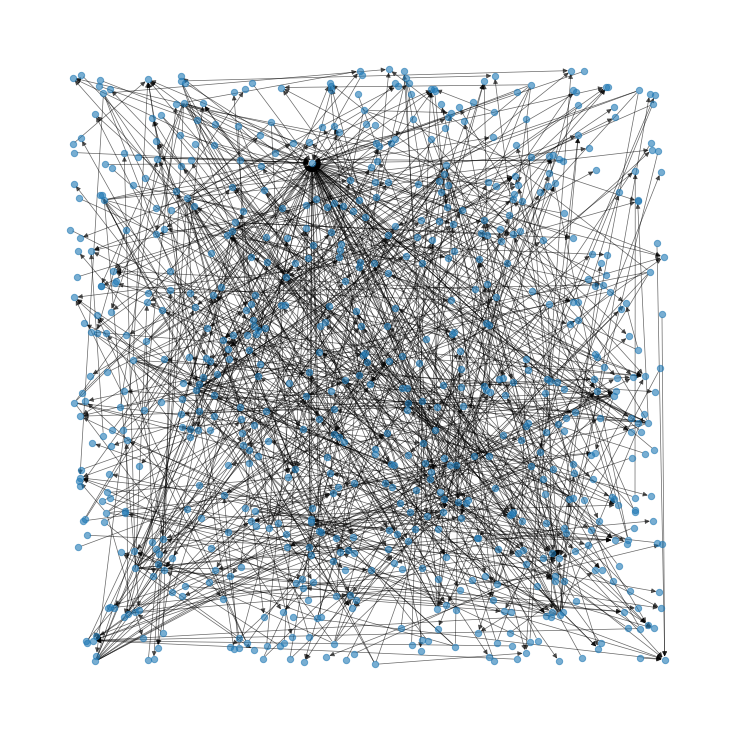

In [2]:
import os
import sys

#sys.path.insert(0, os.path.abspath('env/lib/python3.7/site-packages/'))

import pandas as pd
import numpy as np
import random
import networkx as nx

from tqdm import tqdm
import re
import matplotlib.pyplot as plt


from node2vec import Node2Vec


def plots_graph():
    # plot graph
    plt.figure(figsize=(10,10))
    pos = nx.random_layout(DG)
    nx.draw(DG, with_labels=False,  pos = pos, node_size = 40, alpha = 0.6, width = 0.7)
    plt.show()


data_dir = "/projets/sig/mullah/nlp/prevision_fgpi/"
newretweetuserid_neworiginaluserid_path = os.path.join(data_dir, 'data/processed/UserRetweet_UserOriginal_idOriginalTweet.txt')


# load edges (or links)
with open(newretweetuserid_neworiginaluserid_path) as f:
    links = f.read().splitlines() 

print ("Total links: {}".format(len(links)))

# captture nodes in 2 separate lists
node_list_1 = []
node_list_2 = []

for i in tqdm(links):
    node_list_1.append(i.split(' ')[0])
    node_list_2.append(i.split(' ')[1])
    
links_df = pd.DataFrame({'node_1': node_list_1, 'node_2': node_list_2})

# create graph
DG = nx.from_pandas_edgelist(links_df, "node_1", "node_2", create_using=nx.DiGraph())
print ('Done')
plots_graph()
